# Getting started with py4DSTEM

This notebook is a very simple introduction to py4DSTEM.  This notebook is intended to help you get comfortable with using the basic functonality of py4DSTEM, including concepts such as loading or saving data, or plotting images.

### Table of Contents

* [Part 0 - Import py4DSTEM, download a 4D-STEM dataset, load it.](#part_00)
* [Part 1 - Basic visualization](#part_01)
* [Part 2 - Fancy visualization](#part_02)



### Acknowledgements

This notebook was made by the py4DSTEM team. The 4DSTEM data used here was collected by Steven Zeltmann.

---
<a class="anchor" id="part_00"></a>
# Part 0 - Import py4DSTEM, download a 4D-STEM dataset.

In [3]:
# Initialization - import the needed packages.
# For this tutorial, we will need py4DSTEM and numpy.
# numpy is the package we use to interact with vectors and arrays, and perform math operations.
import py4DSTEM
import numpy as np

You can download the tutorial dataset here: (51.8 megabytes)
* [10 x 10 probe positions 4D-STEM scan in dm3 format](https://drive.google.com/file/d/1B-xX3F65JcWzAg0v7f1aVwnawPIfb5_o/view?usp=sharing)

If you are running in **Binder** run the cell below, otherwise skip

In [2]:
from py4DSTEM.io import download_file_from_google_drive
download_file_from_google_drive("1B-xX3F65JcWzAg0v7f1aVwnawPIfb5_o", "/home/jovyan/data/small4DSTEMscan_10x10.dm3")

ImportError: cannot import name 'download_file_from_google_drive' from 'py4DSTEM.io' (c:\users\cophus\repos\py4dstem\py4DSTEM\io\__init__.py)

In [4]:
# Set the file paths for the input datasets.
# The location of these files may be different, depending on your operating system and browser download path.
# If you are running this tutorial on Binder, you do not need to change this path.
# file_path_input = '/home/jovyan/data/small4DSTEMscan_10x10.dm3'
file_path_input = 'C:/data/small4DSTEMscan_10x10.dm3'

In [5]:
# Load the dm3 file (Gatan digital micrograph format) whose path we just defined
datacube = py4DSTEM.io.read(file_path_input)

In [6]:
# What we just did was 'open' the dm3 file, but as a py4DSTEM DataCube.
# But, what exactly is a py4DSTEM datacube?  Let's try just running it as a python console input:
datacube

Well that wasn't very helpful if you don't already know what a DataCube is!  A py4DSTEM Datacube is a python class. Classes can have properties and methods. The object we defined is named 'datacube', but what it is, is a DataCube-type object. 

You yourself have a name, but we could perhaps say your class is 'human' (or so I assume).

In [7]:
# Let's look at some properties of our class, by putting them in square brackets (a python list)
[datacube.data, datacube.R_N, datacube.Q_Nx, datacube.Q_Ny]

[array([[[[23, 10,  0, ..., 17, 24,  5],
          [ 6,  0,  0, ..., 18,  6,  0],
          [ 0,  0, 26, ...,  5,  0,  0],
          ...,
          [ 0,  5,  0, ...,  5,  0,  9],
          [ 0,  0,  0, ...,  9,  0, 21],
          [27,  0, 11, ...,  0,  0, 17]]],
 
 
        [[[23, 12,  0, ..., 10,  1,  0],
          [ 1,  0,  0, ...,  0,  6,  0],
          [ 0,  0, 23, ...,  3,  0,  0],
          ...,
          [ 0,  3,  3, ...,  0,  0,  3],
          [ 7,  9,  0, ...,  2,  0, 23],
          [29,  0, 10, ...,  0,  0,  0]]],
 
 
        [[[20,  7, 12, ...,  0,  5,  9],
          [ 0,  0,  0, ..., 16,  5,  0],
          [ 0,  0, 13, ...,  3,  0,  0],
          ...,
          [ 0, 12,  1, ...,  3,  1, 17],
          [ 0, 18,  0, ...,  0,  0, 18],
          [38,  0,  0, ...,  0,  0, 13]]],
 
 
        ...,
 
 
        [[[21,  8, 11, ..., 10, 14,  3],
          [ 5,  0,  0, ..., 27,  4,  0],
          [ 1,  0, 25, ..., 11,  0,  0],
          ...,
          [ 0, 12, 11, ...,  6,  0,  9],
   

The first object in our list is the dataset itself - it's quite large, so python (smartly) displays only a little bit of it.

We can see some other properties below the dataset:
* datacube.R_N  = 100
* datacube.Q_Nx = 512
* datacube.Q_Ny = 512

You may have already guessed based on the names, but these are the size of the (3D) array 'data' - The diffraction space dimensions (labeled with Q) are 512 x 512 pixels, and we have recorded 100 probe positions. This shows one of the limitations of the dm3 format - it can only store a 3D array, not a 4D array. However, from the file name we see this scan recorded 10 x 10 probe positions.

In [8]:
# We will try manually reshaping the dataset to have the correct shape, using a DataCube method 'set_scan_shape'
datacube.set_scan_shape(100,100)

Can't reshape 100 scan positions into a 100x100 array.


In [9]:
# Oops!  A typo - this demonstrates the method knows when the new shape is impossible. 
# Set the correct shape:
datacube.set_scan_shape(10,10)

---
<a class="anchor" id="part_01"></a>
# Part 1 - Basic Visualization.

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

Let's first look at a single diffraction pattern.  We know the dataset size is [10 x 10 x 512 x 512], so we much select an x_probe and y_probe coordinate in the range 0:10 (which in python means from index 0 to 9). Let's choose probe position (5,4) - but feel free to change these indices below!

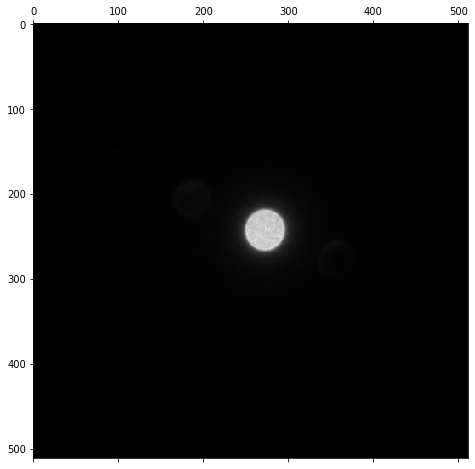

In [10]:
# We will use the basic image plotting function in py4DSTEM, 'show'.
# 4D-STEM datasets in py4DSTEM are 4D numpy arrays - to access a subset of the array values, we need to specify 4 values, on for each dimension.  
# These are:  
#     1st dim = 5, this means probe x position index 5 (vertical from the upper left origin point).
#     2nd dim = 4, this means probe y position index 4 (horizontal from the upper left origin point).
#     3rd dim = :, this means 'return all values along this dimension'
#     4th dim = :, this means 'return all values along this dimension'
py4DSTEM.visualize.show(datacube.data[5,4,:,:])

It's easy to plot this diffraction image, but we can't see any interesting features. We can only see the central spot, i.e. the unscattered Bragg disk.  

To see more details, we need to either use a nonlinear map of intensity --> color, or adjust the color axis range. Both of these are accessed by changing the 'clipvals' mode of py4DSTEM.visualize.show().

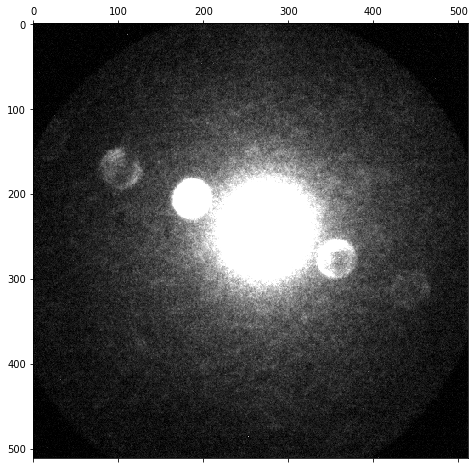

In [11]:
# We will start by adjusting the color axis range. 
# This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).
# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500, we use these arguments:
py4DSTEM.visualize.show(datacube.data[5,4,:,:],
                        clipvals='manual',
                        min=0,
                        max=500)

Much more interesting!  We can see several diffracted Bragg disks, and the distribution of electrons scattered randomly to low angles (characteristic of amorphous samples, or a plasmon background).

However, we had to saturate the center Bragg disk in order to see the weak features.  Can we see both strong and weak features?  

Yes!  We just need to use logarithmic or power law scaling of the image intensity.

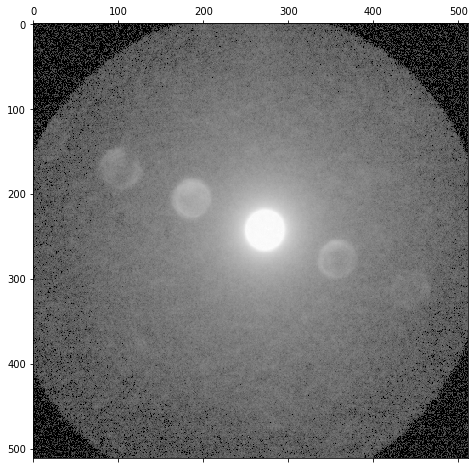

In [12]:
# Let's first try logarithmic scaling 
py4DSTEM.visualize.show(datacube.data[5,4,:,:],
                        scaling='log')

Now we can appreciate the full range of features present in the data:
- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles
- a hard aperture blocking all electrons at high angles (likely the HAADF detector).
- The extremely weak 'dark current' noise outside of the hard aperture.

We can manually specify the intensity range for logarithm scaling too:

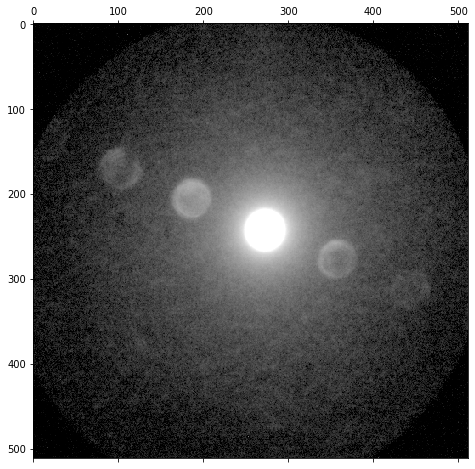

In [13]:
py4DSTEM.visualize.show(datacube.data[5,4,:,:],
                        scaling='log',
                        clipvals='manual',
                        min=20,
                        max=10000)

Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.

However for visualization of diffraction patterns, scaling by a power law is often more useful. This is because we can tune the power (intensity^power) to achieve the desired scaling, and because the extremely weak features (such as detector dark current) are typically not that interesting.

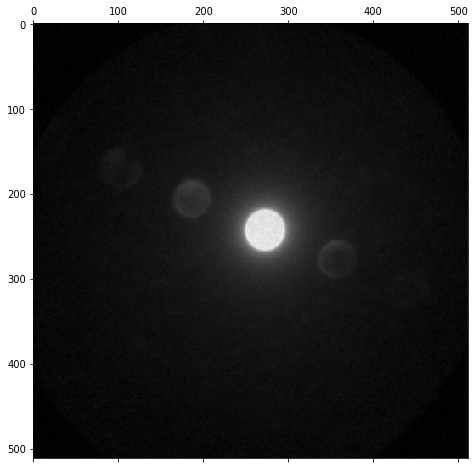

In [14]:
# Power law scaling using the square root:
py4DSTEM.visualize.show(datacube.data[5,4,:,:],
                        scaling='power',
                        power=0.5)

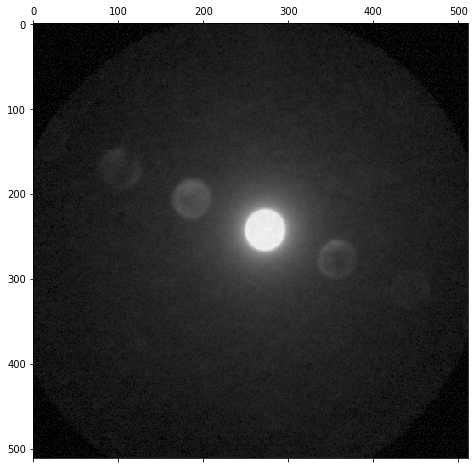

In [15]:
# Power law scaling using the cube root:
py4DSTEM.visualize.show(datacube.data[5,4,:,:],
                        scaling='power',
                        power=0.333)

The above is an example for a single diffraction pattern. Real experiments might consist of thousands or even millions of diffraction patterns however. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal?  Polycrstalline?  Amorphous?  A mixture?  To answer these questions, we need to operate on the entire dataset - the simplest such operation is to calculate the mean diffraction pattern.

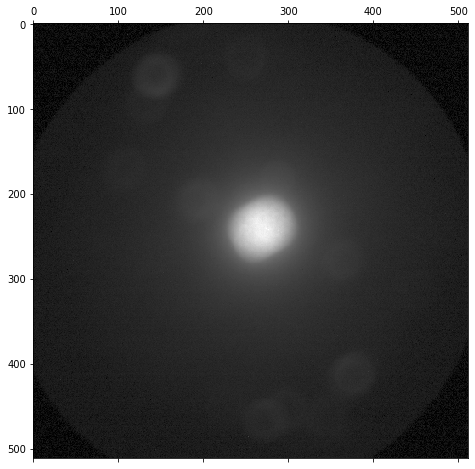

In [16]:
# Calculate the mean diffraction pattern over axis=0 and 1 (the probe x and y scan directions)
diff_mean = np.mean(datacube.data,axis=(0,1))

# Plot the mean diffraction pattern
py4DSTEM.visualize.show(diff_mean,
                       scaling='power',
                       power=0.333)

We see a few interesting features, such as the center beam smearing out due to shifts of the diffraction pattern during the scan (due to de-scan of the STEM probe).

However, it's very difficult to see diffraction features which may occur in a small number of scan positions.

We have a standard solution to this problem - we typically visualize the **maximum** diffraction pattern, rather than the mean.  By this, we mean the maximum signal of each pixel in diffraction space over all probe positons.

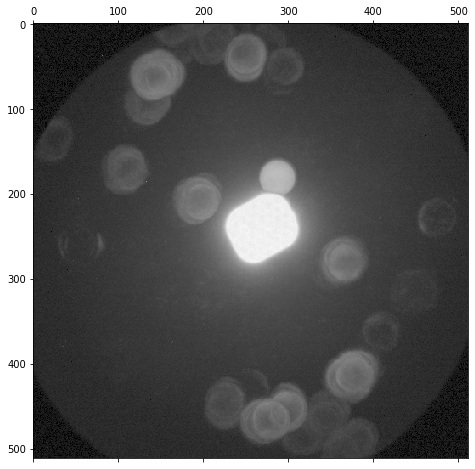

In [17]:
# Calculate the mean diffraction pattern over axis=0 and 1 (the probe x and y scan directions)
diff_max = np.max(datacube.data,axis=(0,1))

# Plot the mean diffraction pattern
py4DSTEM.visualize.show(diff_max,
                       scaling='power',
                       power=0.25)

Now we have a good idea of the contents of this 10 x 10 position dataset - various randomly oriented grains with strong Bragg diffraction, and a significant amount of diffraction shift (note the rectnagular shape traced out by the center beam).

Next, let's visualize this data in real space using virtual detectors. Specifically, we will generate a virtual bright field (BF) and virtual dark field (DF) image. For this, we need to know the position of the center disk and an approximate ratius for it.

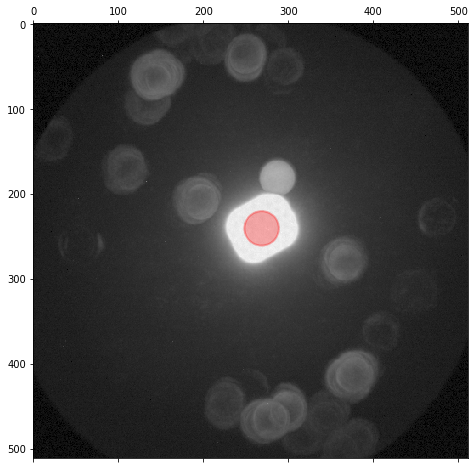

Estimated probe radius = 20.25 pixels


In [21]:
# Estimate the radius of the BF disk, and the center coordinates
probe_semiangle, qx0, qy0 = py4DSTEM.process.calibration.get_probe_size(diff_mean)

# plot the mean diffraction pattern, with the estimated probe radius overlaid as a circle
py4DSTEM.visualize.show_circles(
    diff_max, 
    (qx0, qy0), 
    probe_semiangle,
    scaling='power',
    power=0.333)

# Print the estimate probe radius
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

The estimated probe size is too small, because of the diffraction shift of this pattern.  We could align all of the images, but it's typically much faster to just expand the bright field detector range. 

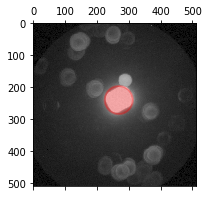

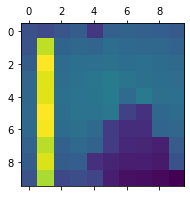

In [24]:
# Create a bright field (BF) virtual detector using the the center beam position, and expanding the radius slightly (+ 24 px).
expand_BF = 24.0
image_BF = py4DSTEM.process.virtualimage.get_virtualimage_circ(datacube, 
                                                               qx0, qy0, 
                                                               probe_semiangle + expand_BF)

# Show the BF image, next to the virtual detector we have used
py4DSTEM.visualize.show_circles(diff_max, 
                                (qx0, qy0), 
                                probe_semiangle + expand_BF, 
                                figsize=(3,3),
                                scaling='power',
                                power=0.333)


py4DSTEM.visualize.show(
    image_BF,
    figsize=(3,3),
    cmap='viridis')

In [ ]:
# Create a dark field (DF) virtual detector using the the center beam position, with an inner angle laeger than  (+ 10 px).
expand_BF = 10.0
image_DF = py4DSTEM.process.virtualimage.get_virtualimage_ann(
    datacube, 
    qx0, qy0, 
    probe_semiangle + expand_BF,
    1e3)

# Show the BF image, next to the virtual detector we have used
py4DSTEM.visualize.show_circles(diff_mean, 
                                (qx0, qy0), 
                                probe_semiangle + expand_BF, 
                                figsize=(3,3))
py4DSTEM.visualize.show(
    image_DF,
    figsize=(3,3),
    cmap='viridis')

---
<a class="anchor" id="part_02"></a>
# Part 2 - Advanced Visualization.

py4DSTEM also supports various fancier visualization methods.  We will go through a few examples here. (TODO)